<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_Viral_low_10000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

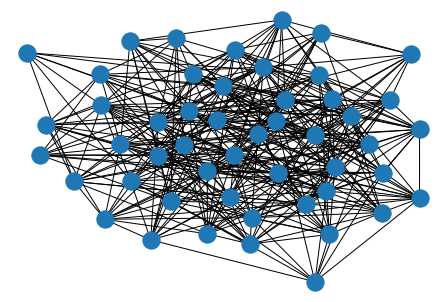

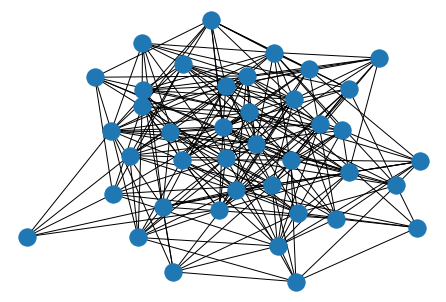

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 50 nodes contact network of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3 #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


# some network properties
#print("the adjacency list")
#for line in nx.generate_adjlist(Graph):
#    print(line)

nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
#!jupyter notebook --generate-config

In [3]:
#%%writefile /root/.jupyter/jupyter_notebook_config.py
#NotebookApp.iopub_data_rate_limit =
#NotebookApp.rate_limit_window =

In [4]:
#%pycat /root/.jupyter/jupyter_notebook_config.py

In [5]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 [0 1 0 ... 1 1 1]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]
[[0 0 0 ... 0 1 0]
 [0 0 1 ... 1 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]


In [6]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [7]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [8]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  #Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
  #Agent[k].append({'State' : Rand_state})
  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [9]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [10]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load'])/2})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  #if Agent_next[a_id][1]['Home_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  #if Agent_next[a_id][3]['First_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent[a_id][3]['First_node'])
                  #if Agent_next[a_id][5]['Second_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']) :
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:
                      if len(neighbors) == 3:
                        PN=(1/(Node[cur][2]['I'] + Node[cur][1]['S'] + 1))
                        P = 100-PN 
                        #print(P)
                        #print(PN)
                        next = random.choices(neighbors,weights=(P,PN/2,PN/2), k=1)[0] 
                      elif len(neighbors) == 2:
                        next = random.choices(neighbors,weights=(P,PN), k=1)[0]
                      else:
                        next = random.choices(neighbors,weights=(100), k=1)[0]
                      #next = random.choice(neighbors)
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      PN1=(1/(Node[cur][2]['I'] + Node[cur][1]['S'] + 1))
                      P1 = 100-PN1  
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(P1,PN1/2,PN1/2),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            Node_next[nex][0]['Viral_load']+=1
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=2
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          #print(Agent[a_id])
          #print(curr_walk)
          walks.append(nex)
    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] < .01:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home)  
    return Node,Node_next,Agent,Agent_next

In [11]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [12]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9808, 9527, 9162, 8962, 8907, 8890, 8876, 8851, 8831, 8806, 8784, 8775, 8769, 8758, 8750, 8745, 8740, 8739, 8739, 8739, 8739, 8739, 8739, 8735, 8732, 8732, 8730, 8729, 8727, 8727, 8727, 8727, 8727, 8727, 8727, 8727]
[192, 473, 838, 1038, 1093, 1110, 1124, 957, 696, 356, 178, 132, 121, 118, 101, 86, 66, 45, 36, 30, 19, 11, 6, 5, 7, 7, 9, 10, 12, 12, 8, 5, 5, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 192, 473, 838, 1038, 1093, 1110, 1124, 1149, 1169, 1194, 1216, 1225, 1231, 1242, 1250, 1255, 1260, 1261, 1261, 1261, 1261, 1261, 1261, 1265, 1268, 1268, 1270, 1271, 1273]
[[], [9808, 9527, 9162, 8962, 8907, 8890, 8876, 8851, 8831, 8806, 8784, 8775, 8769, 8758, 8750, 8745, 8740, 8739, 8739, 8739, 8739, 8739, 8739, 8735, 8732, 8732, 8730, 8729, 8727, 8727, 8727, 8727, 8727, 8727, 8727, 8727]]
[[], [192, 473, 838, 1038, 1093, 1110, 1124, 957, 696, 356, 178, 132, 121, 118, 101, 86, 66, 45, 36, 30, 19, 11, 6, 5, 7, 7, 9, 10, 12, 12, 8, 5, 5, 3, 2, 0]]
[[], [0, 0, 0, 0, 0, 0, 0, 192, 473, 838, 1038, 1093, 1

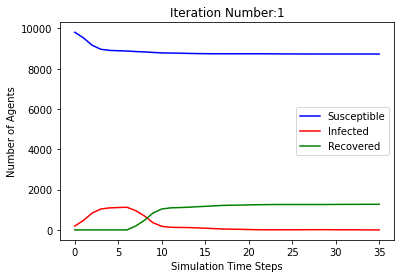

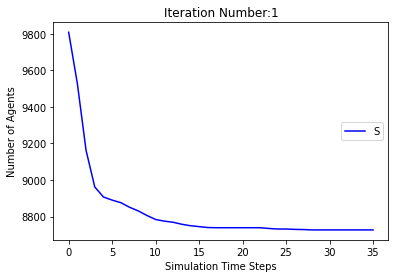

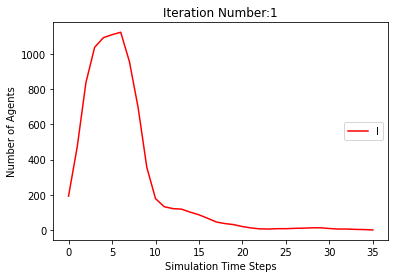

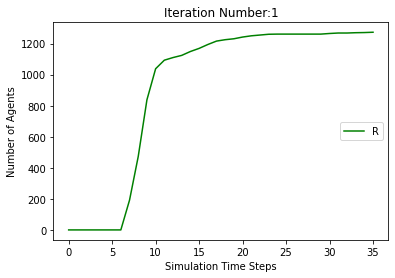

[9808, 9507, 9150, 8940, 8883, 8860, 8836, 8817, 8795, 8761, 8736, 8719, 8714, 8712, 8711, 8709, 8707, 8706, 8706, 8706, 8706, 8706, 8706, 8706, 8706]
[192, 493, 850, 1060, 1117, 1140, 1164, 991, 712, 389, 204, 164, 146, 124, 106, 86, 54, 30, 13, 8, 6, 5, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 192, 493, 850, 1060, 1117, 1140, 1164, 1183, 1205, 1239, 1264, 1281, 1286, 1288, 1289, 1291, 1293, 1294]
[[], [9808, 9527, 9162, 8962, 8907, 8890, 8876, 8851, 8831, 8806, 8784, 8775, 8769, 8758, 8750, 8745, 8740, 8739, 8739, 8739, 8739, 8739, 8739, 8735, 8732, 8732, 8730, 8729, 8727, 8727, 8727, 8727, 8727, 8727, 8727, 8727], [9808, 9507, 9150, 8940, 8883, 8860, 8836, 8817, 8795, 8761, 8736, 8719, 8714, 8712, 8711, 8709, 8707, 8706, 8706, 8706, 8706, 8706, 8706, 8706, 8706]]
[[], [192, 473, 838, 1038, 1093, 1110, 1124, 957, 696, 356, 178, 132, 121, 118, 101, 86, 66, 45, 36, 30, 19, 11, 6, 5, 7, 7, 9, 10, 12, 12, 8, 5, 5, 3, 2, 0], [192, 493, 850, 1060, 1117, 1140, 1164, 991, 712, 389, 204, 164, 146, 124,

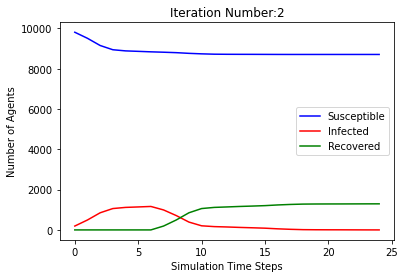

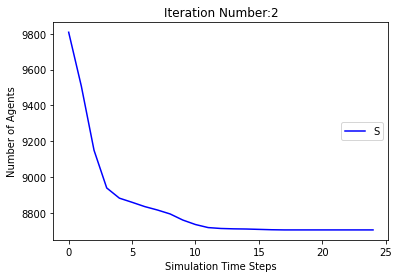

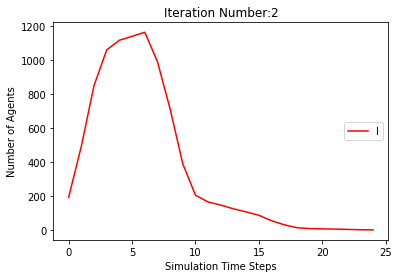

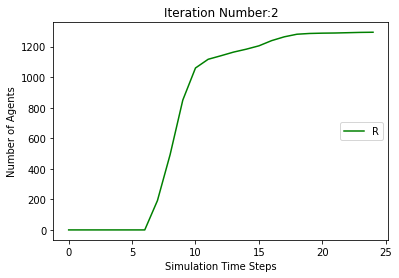

[9808, 9496, 9140, 8950, 8899, 8859, 8848, 8839, 8825, 8813, 8804, 8799, 8796, 8792, 8791, 8789, 8787, 8787, 8787, 8786, 8784, 8783, 8781, 8781, 8781, 8781, 8780, 8780, 8779, 8779, 8779, 8779, 8779, 8777, 8775, 8771, 8770, 8770, 8770, 8770, 8770, 8770, 8769, 8769, 8769, 8769, 8769, 8769, 8769, 8769]
[192, 504, 860, 1050, 1101, 1141, 1152, 969, 671, 327, 146, 100, 63, 56, 48, 36, 26, 17, 12, 10, 8, 8, 8, 6, 6, 6, 6, 4, 4, 2, 2, 2, 2, 3, 5, 8, 9, 9, 9, 9, 7, 5, 2, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 192, 504, 860, 1050, 1101, 1141, 1152, 1161, 1175, 1187, 1196, 1201, 1204, 1208, 1209, 1211, 1213, 1213, 1213, 1214, 1216, 1217, 1219, 1219, 1219, 1219, 1220, 1220, 1221, 1221, 1221, 1221, 1221, 1223, 1225, 1229, 1230, 1230, 1230, 1230, 1230, 1230, 1231]
[[], [9808, 9527, 9162, 8962, 8907, 8890, 8876, 8851, 8831, 8806, 8784, 8775, 8769, 8758, 8750, 8745, 8740, 8739, 8739, 8739, 8739, 8739, 8739, 8735, 8732, 8732, 8730, 8729, 8727, 8727, 8727, 8727, 8727, 8727, 8727, 8727], [9808, 9507,

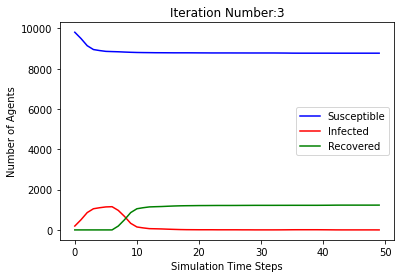

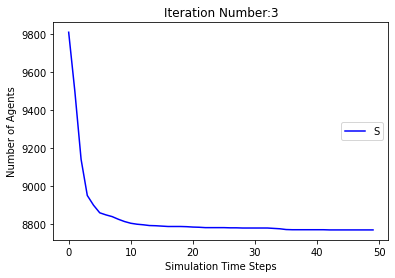

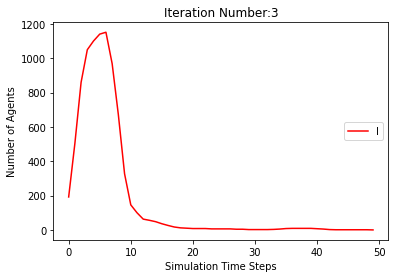

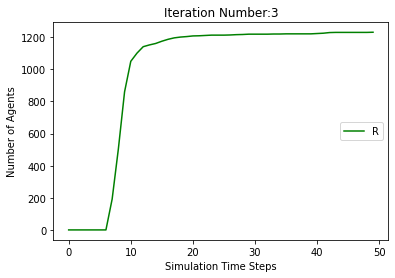

[9808, 9491, 9127, 8917, 8855, 8832, 8812, 8782, 8741, 8702, 8674, 8658, 8648, 8641, 8635, 8634, 8633, 8632, 8630, 8627, 8625, 8625, 8625, 8625, 8625, 8625, 8625, 8625]
[192, 509, 873, 1083, 1145, 1168, 1188, 1026, 750, 425, 243, 197, 184, 171, 147, 107, 69, 42, 28, 21, 16, 10, 9, 8, 7, 5, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 192, 509, 873, 1083, 1145, 1168, 1188, 1218, 1259, 1298, 1326, 1342, 1352, 1359, 1365, 1366, 1367, 1368, 1370, 1373, 1375]
[[], [9808, 9527, 9162, 8962, 8907, 8890, 8876, 8851, 8831, 8806, 8784, 8775, 8769, 8758, 8750, 8745, 8740, 8739, 8739, 8739, 8739, 8739, 8739, 8735, 8732, 8732, 8730, 8729, 8727, 8727, 8727, 8727, 8727, 8727, 8727, 8727], [9808, 9507, 9150, 8940, 8883, 8860, 8836, 8817, 8795, 8761, 8736, 8719, 8714, 8712, 8711, 8709, 8707, 8706, 8706, 8706, 8706, 8706, 8706, 8706, 8706], [9808, 9496, 9140, 8950, 8899, 8859, 8848, 8839, 8825, 8813, 8804, 8799, 8796, 8792, 8791, 8789, 8787, 8787, 8787, 8786, 8784, 8783, 8781, 8781, 8781, 8781, 8780, 8780, 8779, 8779, 87

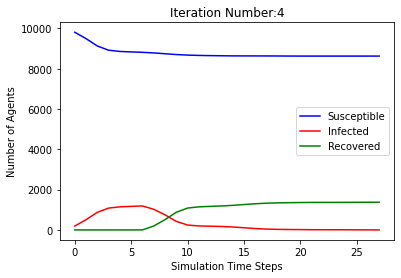

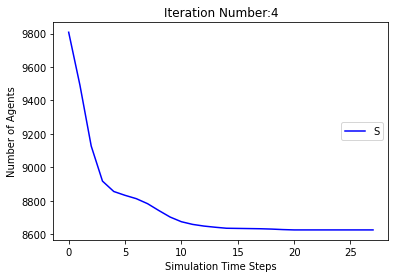

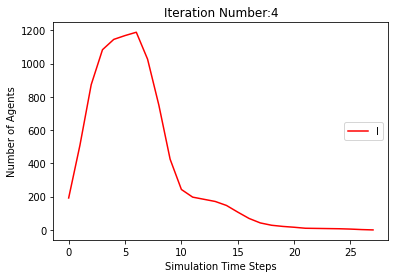

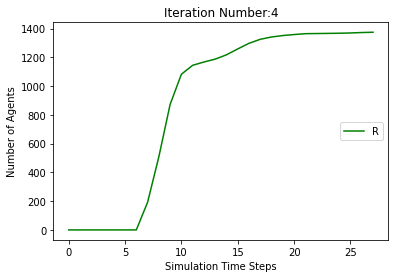

[9808, 9517, 9138, 8934, 8871, 8846, 8823, 8803, 8767, 8753, 8737, 8722, 8709, 8701, 8699, 8699, 8698, 8697, 8696, 8694, 8693, 8692, 8692, 8692, 8692, 8692, 8692, 8692, 8692]
[192, 483, 862, 1066, 1129, 1154, 1177, 1005, 750, 385, 197, 149, 137, 122, 104, 68, 55, 40, 26, 15, 8, 7, 7, 6, 5, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 192, 483, 862, 1066, 1129, 1154, 1177, 1197, 1233, 1247, 1263, 1278, 1291, 1299, 1301, 1301, 1302, 1303, 1304, 1306, 1307, 1308]
[[], [9808, 9527, 9162, 8962, 8907, 8890, 8876, 8851, 8831, 8806, 8784, 8775, 8769, 8758, 8750, 8745, 8740, 8739, 8739, 8739, 8739, 8739, 8739, 8735, 8732, 8732, 8730, 8729, 8727, 8727, 8727, 8727, 8727, 8727, 8727, 8727], [9808, 9507, 9150, 8940, 8883, 8860, 8836, 8817, 8795, 8761, 8736, 8719, 8714, 8712, 8711, 8709, 8707, 8706, 8706, 8706, 8706, 8706, 8706, 8706, 8706], [9808, 9496, 9140, 8950, 8899, 8859, 8848, 8839, 8825, 8813, 8804, 8799, 8796, 8792, 8791, 8789, 8787, 8787, 8787, 8786, 8784, 8783, 8781, 8781, 8781, 8781, 8780, 8780, 87

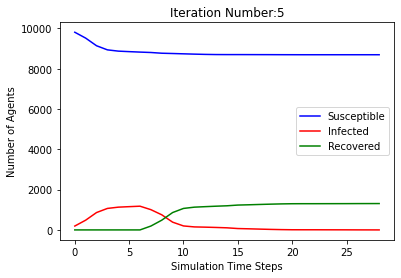

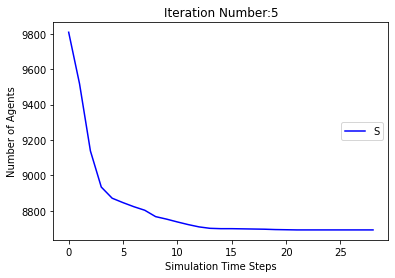

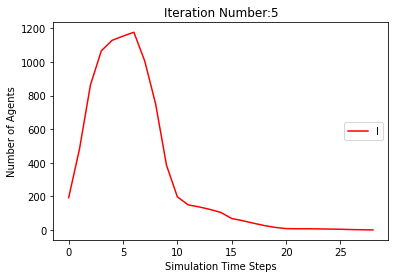

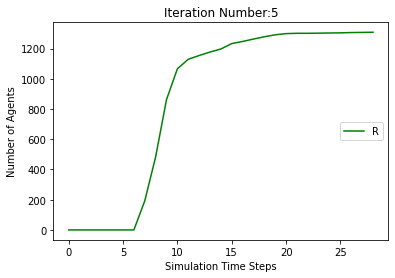

[9808, 9497, 9143, 8944, 8888, 8865, 8847, 8820, 8797, 8775, 8750, 8739, 8731, 8725, 8723, 8723, 8722, 8720, 8717, 8715, 8715, 8715, 8715, 8714, 8714, 8714, 8714, 8714, 8714, 8714, 8714]
[192, 503, 857, 1056, 1112, 1135, 1153, 988, 700, 368, 194, 149, 134, 122, 97, 74, 53, 30, 22, 16, 10, 8, 8, 8, 6, 3, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 192, 503, 857, 1056, 1112, 1135, 1153, 1180, 1203, 1225, 1250, 1261, 1269, 1275, 1277, 1277, 1278, 1280, 1283, 1285, 1285, 1285, 1285, 1286]
[[], [9808, 9527, 9162, 8962, 8907, 8890, 8876, 8851, 8831, 8806, 8784, 8775, 8769, 8758, 8750, 8745, 8740, 8739, 8739, 8739, 8739, 8739, 8739, 8735, 8732, 8732, 8730, 8729, 8727, 8727, 8727, 8727, 8727, 8727, 8727, 8727], [9808, 9507, 9150, 8940, 8883, 8860, 8836, 8817, 8795, 8761, 8736, 8719, 8714, 8712, 8711, 8709, 8707, 8706, 8706, 8706, 8706, 8706, 8706, 8706, 8706], [9808, 9496, 9140, 8950, 8899, 8859, 8848, 8839, 8825, 8813, 8804, 8799, 8796, 8792, 8791, 8789, 8787, 8787, 8787, 8786, 8784, 8783, 8781, 878

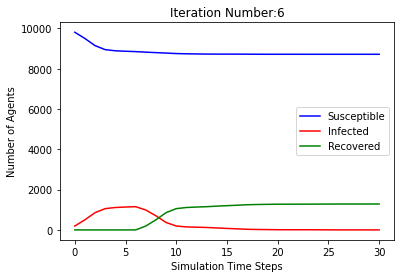

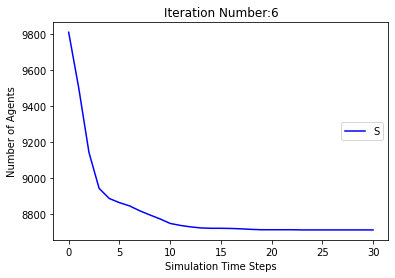

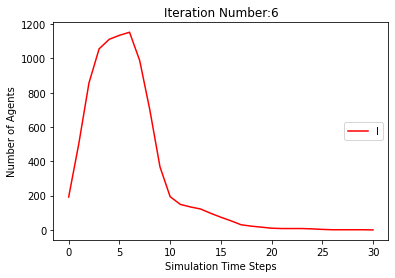

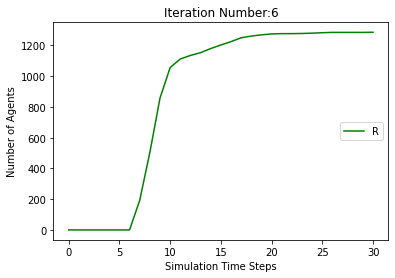

[9808, 9534, 9158, 8969, 8898, 8875, 8862, 8854, 8835, 8823, 8815, 8808, 8801, 8799, 8797, 8794, 8793, 8791, 8791, 8791, 8791, 8791, 8790, 8788, 8786, 8786, 8786, 8786, 8786, 8786, 8786, 8786]
[192, 466, 842, 1031, 1102, 1125, 1138, 954, 699, 335, 154, 90, 74, 63, 57, 41, 30, 24, 17, 10, 8, 6, 4, 5, 5, 5, 5, 5, 5, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 192, 466, 842, 1031, 1102, 1125, 1138, 1146, 1165, 1177, 1185, 1192, 1199, 1201, 1203, 1206, 1207, 1209, 1209, 1209, 1209, 1209, 1210, 1212, 1214]
[[], [9808, 9527, 9162, 8962, 8907, 8890, 8876, 8851, 8831, 8806, 8784, 8775, 8769, 8758, 8750, 8745, 8740, 8739, 8739, 8739, 8739, 8739, 8739, 8735, 8732, 8732, 8730, 8729, 8727, 8727, 8727, 8727, 8727, 8727, 8727, 8727], [9808, 9507, 9150, 8940, 8883, 8860, 8836, 8817, 8795, 8761, 8736, 8719, 8714, 8712, 8711, 8709, 8707, 8706, 8706, 8706, 8706, 8706, 8706, 8706, 8706], [9808, 9496, 9140, 8950, 8899, 8859, 8848, 8839, 8825, 8813, 8804, 8799, 8796, 8792, 8791, 8789, 8787, 8787, 8787, 8786, 8784, 8783

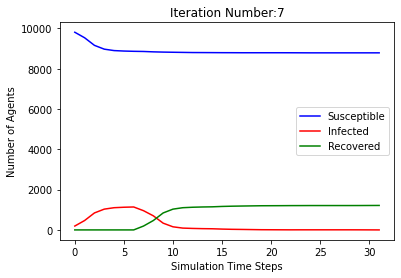

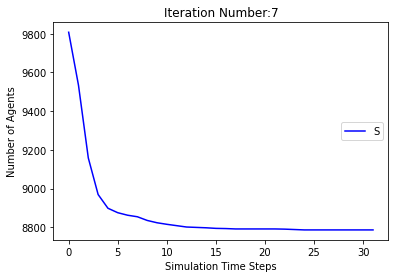

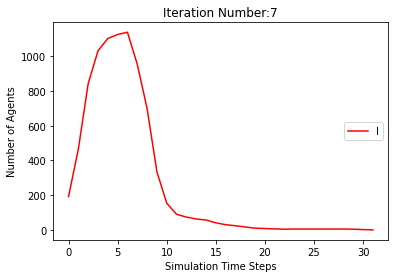

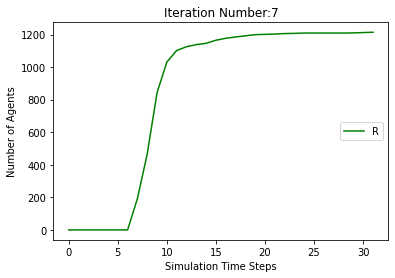

[9808, 9487, 9122, 8933, 8884, 8865, 8833, 8812, 8792, 8781, 8772, 8756, 8741, 8730, 8724, 8717, 8715, 8712, 8711, 8711, 8711, 8710, 8710, 8710, 8710, 8710, 8710, 8710, 8710]
[192, 513, 878, 1067, 1116, 1135, 1167, 996, 695, 341, 161, 128, 124, 103, 88, 75, 66, 60, 45, 30, 19, 14, 7, 5, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 192, 513, 878, 1067, 1116, 1135, 1167, 1188, 1208, 1219, 1228, 1244, 1259, 1270, 1276, 1283, 1285, 1288, 1289, 1289, 1289, 1290]
[[], [9808, 9527, 9162, 8962, 8907, 8890, 8876, 8851, 8831, 8806, 8784, 8775, 8769, 8758, 8750, 8745, 8740, 8739, 8739, 8739, 8739, 8739, 8739, 8735, 8732, 8732, 8730, 8729, 8727, 8727, 8727, 8727, 8727, 8727, 8727, 8727], [9808, 9507, 9150, 8940, 8883, 8860, 8836, 8817, 8795, 8761, 8736, 8719, 8714, 8712, 8711, 8709, 8707, 8706, 8706, 8706, 8706, 8706, 8706, 8706, 8706], [9808, 9496, 9140, 8950, 8899, 8859, 8848, 8839, 8825, 8813, 8804, 8799, 8796, 8792, 8791, 8789, 8787, 8787, 8787, 8786, 8784, 8783, 8781, 8781, 8781, 8781, 8780, 8780, 87

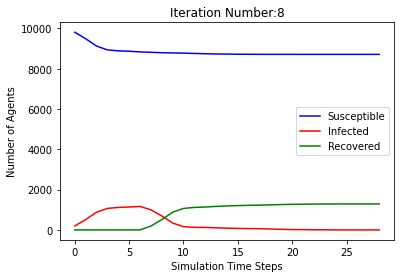

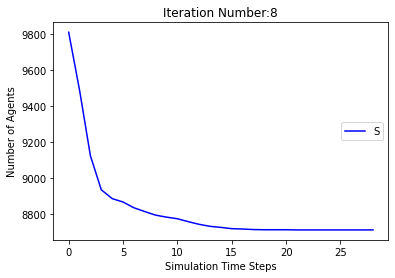

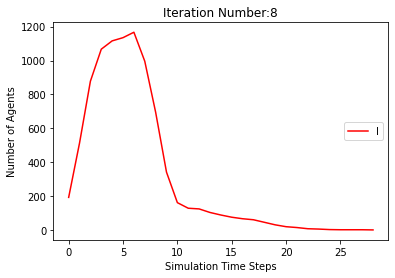

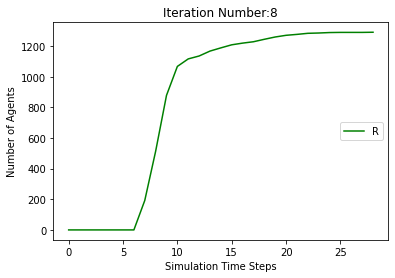

[9808, 9497, 9116, 8942, 8897, 8875, 8857, 8834, 8813, 8797, 8782, 8770, 8760, 8755, 8750, 8745, 8735, 8733, 8733, 8733, 8733, 8733, 8733, 8732, 8732, 8731, 8729, 8729, 8729, 8728, 8726, 8722, 8721, 8721, 8721, 8721, 8721, 8721, 8721, 8721]
[192, 503, 884, 1058, 1103, 1125, 1143, 974, 684, 319, 160, 127, 115, 102, 84, 68, 62, 49, 37, 27, 22, 17, 12, 3, 1, 2, 4, 4, 4, 5, 6, 10, 10, 8, 8, 8, 7, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 192, 503, 884, 1058, 1103, 1125, 1143, 1166, 1187, 1203, 1218, 1230, 1240, 1245, 1250, 1255, 1265, 1267, 1267, 1267, 1267, 1267, 1267, 1268, 1268, 1269, 1271, 1271, 1271, 1272, 1274, 1278, 1279]
[[], [9808, 9527, 9162, 8962, 8907, 8890, 8876, 8851, 8831, 8806, 8784, 8775, 8769, 8758, 8750, 8745, 8740, 8739, 8739, 8739, 8739, 8739, 8739, 8735, 8732, 8732, 8730, 8729, 8727, 8727, 8727, 8727, 8727, 8727, 8727, 8727], [9808, 9507, 9150, 8940, 8883, 8860, 8836, 8817, 8795, 8761, 8736, 8719, 8714, 8712, 8711, 8709, 8707, 8706, 8706, 8706, 8706, 8706, 8706, 8706, 8706], [98

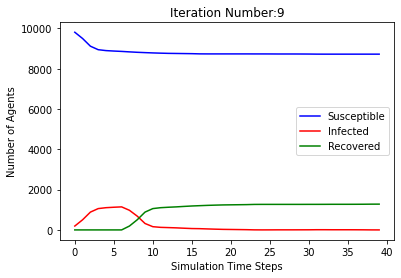

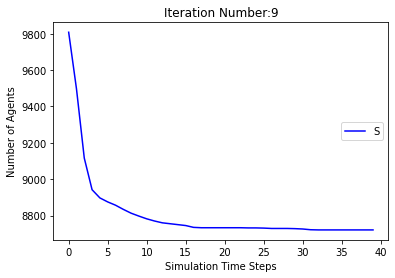

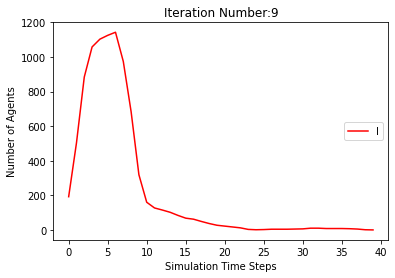

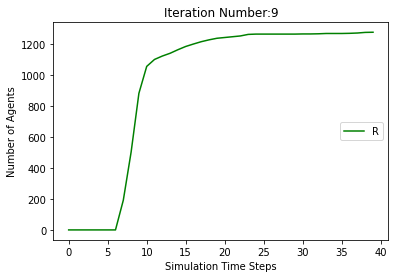

[9808, 9496, 9147, 8947, 8870, 8848, 8816, 8785, 8763, 8754, 8744, 8735, 8727, 8724, 8721, 8716, 8710, 8702, 8696, 8692, 8689, 8685, 8683, 8681, 8681, 8681, 8681, 8681, 8681, 8681, 8681]
[192, 504, 853, 1053, 1130, 1152, 1184, 1023, 733, 393, 203, 135, 121, 92, 64, 47, 44, 42, 39, 35, 35, 36, 33, 29, 21, 15, 11, 8, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 192, 504, 853, 1053, 1130, 1152, 1184, 1215, 1237, 1246, 1256, 1265, 1273, 1276, 1279, 1284, 1290, 1298, 1304, 1308, 1311, 1315, 1317, 1319]
[[], [9808, 9527, 9162, 8962, 8907, 8890, 8876, 8851, 8831, 8806, 8784, 8775, 8769, 8758, 8750, 8745, 8740, 8739, 8739, 8739, 8739, 8739, 8739, 8735, 8732, 8732, 8730, 8729, 8727, 8727, 8727, 8727, 8727, 8727, 8727, 8727], [9808, 9507, 9150, 8940, 8883, 8860, 8836, 8817, 8795, 8761, 8736, 8719, 8714, 8712, 8711, 8709, 8707, 8706, 8706, 8706, 8706, 8706, 8706, 8706, 8706], [9808, 9496, 9140, 8950, 8899, 8859, 8848, 8839, 8825, 8813, 8804, 8799, 8796, 8792, 8791, 8789, 8787, 8787, 8787, 8786, 8784, 8783, 878

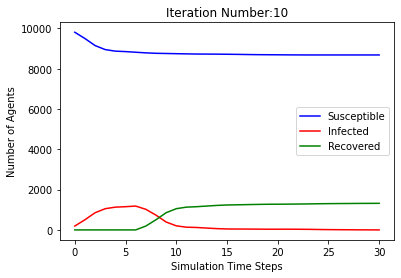

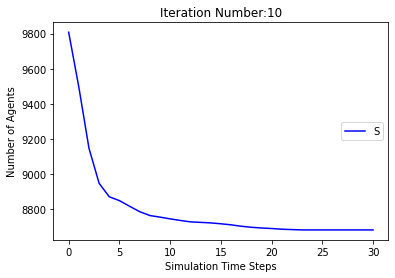

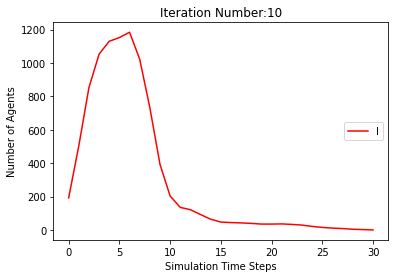

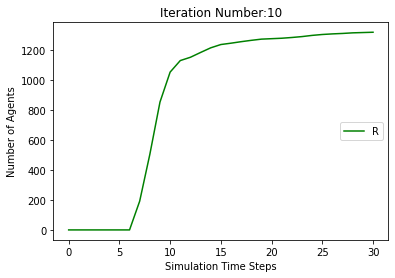

In [13]:
#from numpy import zeros, linspace
#Node_p=Node.copy()
#Node_n=Node.copy() 
#Agent_p=Agent.copy()
#Agent_n=Agent.copy()
#print(Node_p)
#print(Agent_p)
#S,I,R = Count_SIR_Node(Node_n) 
#S1,I1,R1 = Count_SIR_Agent(Agent_n)
#print([S,I,R]) 
#print([S1,I1,R1])
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    #count=0
    #for i in range(len(Node_p)):
    #  count+=len(Node_p[i]) - 4
    #print(count)
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    #S1,I1,R1 = Count_SIR_Agent(Agent_n)
    #print("Simulation No:",i+1, "Iteration No: ", j)
    #print(Node_n)
    #print(Agent_n)
    #print([Sj,Ij,Rj]) 
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    #print([S1,I1,R1])
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

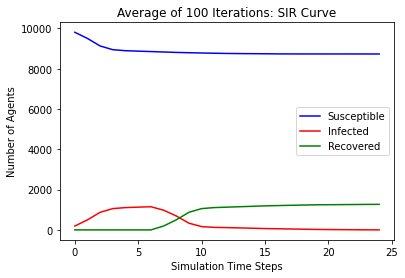

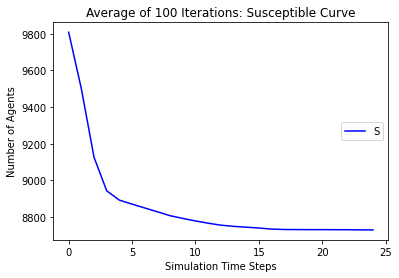

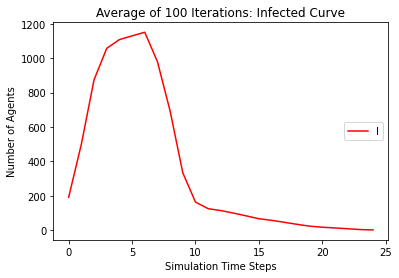

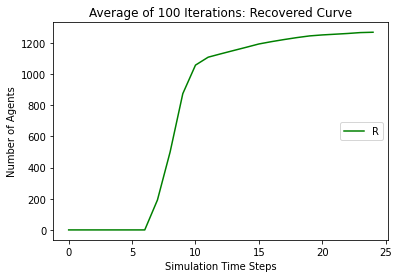

In [14]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  


  
